# Step 8 : Test The Model

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
from detectron2.config import get_cfg
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog

cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Keypoints/keypoint_rcnn_R_101_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("trousers_train",)
cfg.DATASETS.TEST = ("trousers_val",)
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1
cfg.MODEL.ROI_KEYPOINT_HEAD.NUM_KEYPOINTS = 14
cfg.TEST.KEYPOINT_OKS_SIGMAS = [0.1] * 14
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = "/content/deepfashion2_trousers_subset/output_trousers_keypoints_101/model_final.pth"
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.1
cfg.OUTPUT_DIR = "/content/deepfashion2_trousers_subset/output_trousers_keypoints_101"

predictor = DefaultPredictor(cfg)
metadata = MetadataCatalog.get("trousers_val")

/usr/local/lib/python3.11/dist-packages/torch/functional.py:539: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /pytorch/aten/src/ATen/native/TensorShape.cpp:3637.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


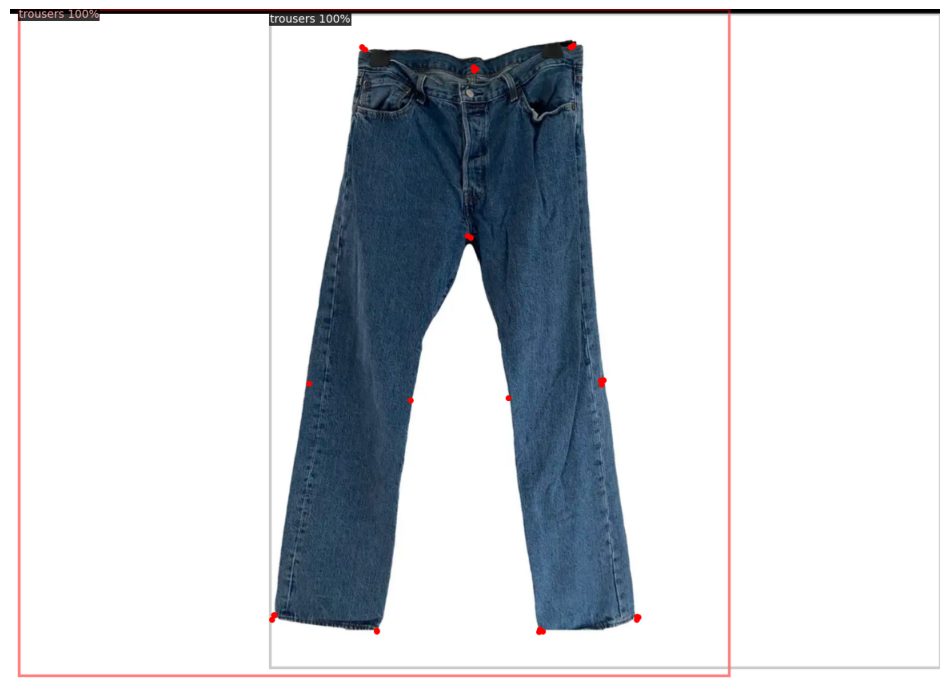

In [ ]:
image_path = "/content/deepfashion2_trousers_subset/Complete_Trousers_Dataset/test/image/test_image_2.png"

img = cv2.imread(image_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
outputs = predictor(img)

v = Visualizer(img_rgb, metadata=metadata, scale=1.0)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))

plt.figure(figsize=(12, 12))
plt.imshow(out.get_image())
plt.axis("off")
plt.title("Prediction on Single Test Image")
plt.show()

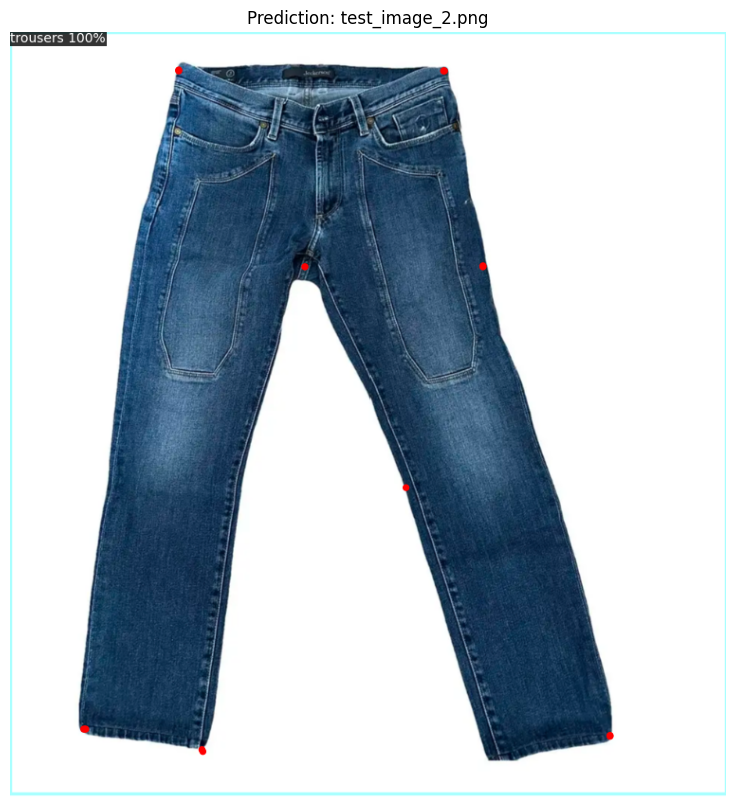

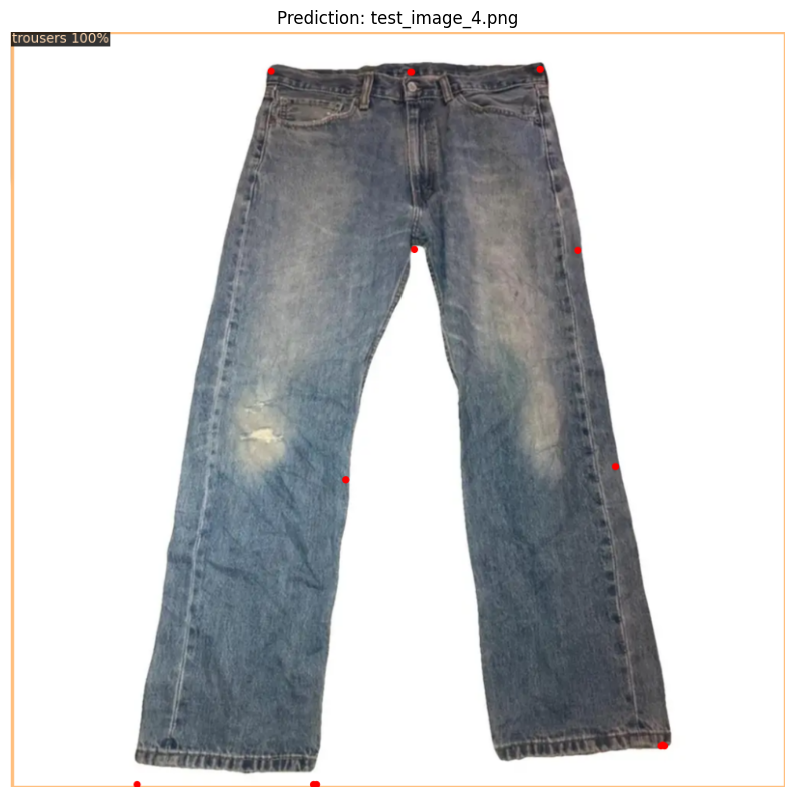

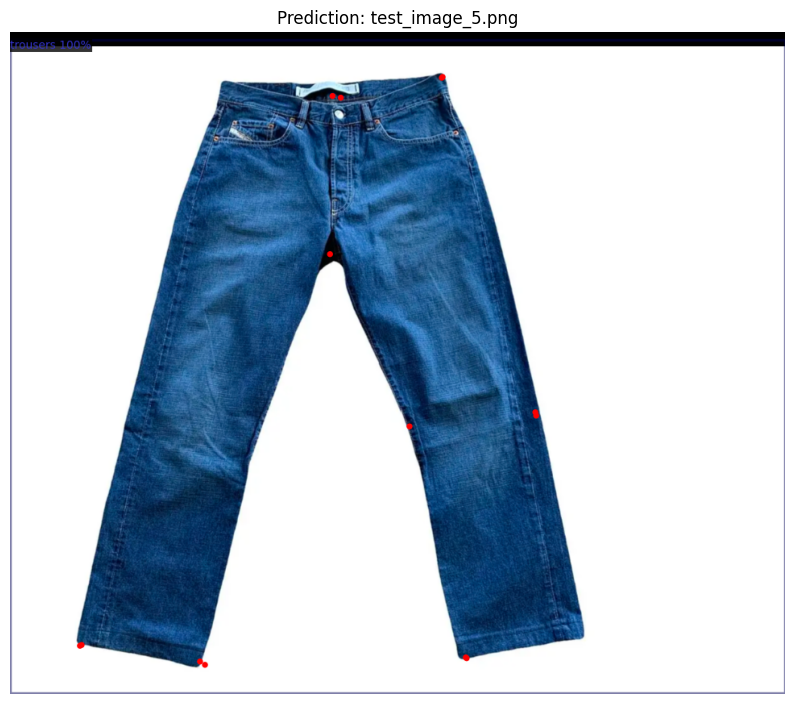

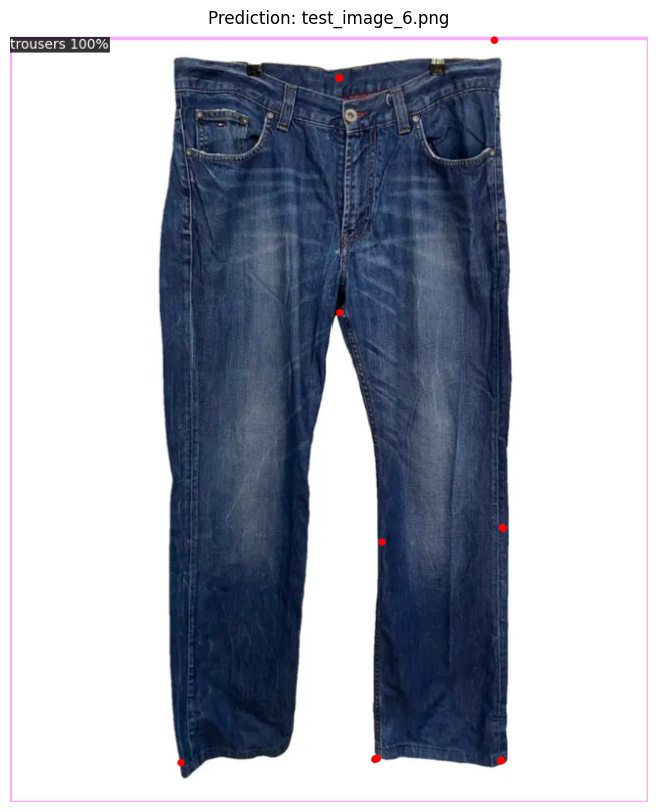

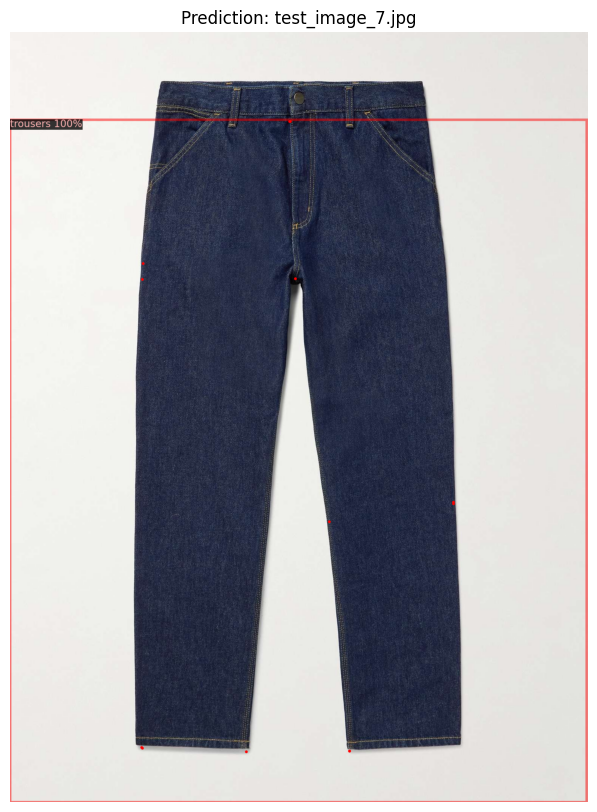

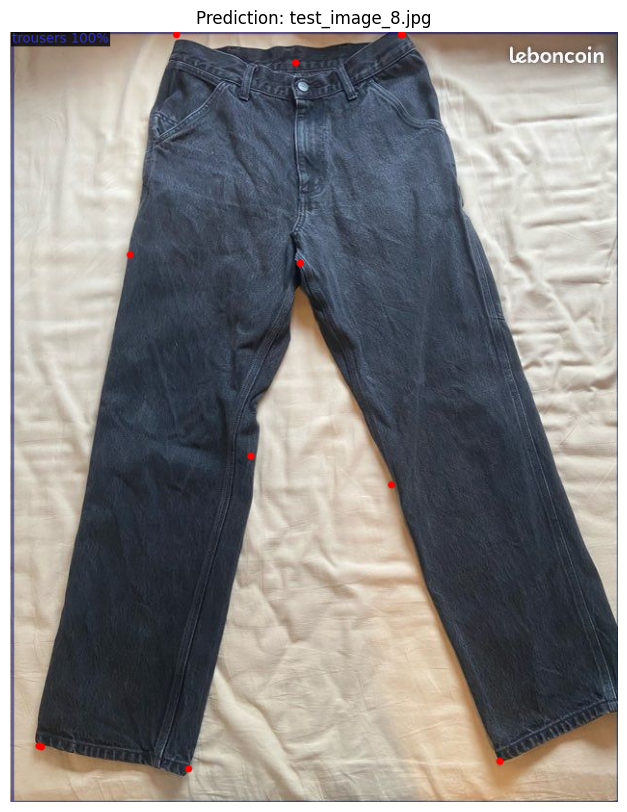

In [ ]:
test_folder = "/content/deepfashion2_trousers_subset/Complete_Trousers_Dataset/test/image"

image_files = sorted([
    f for f in os.listdir(test_folder)
    if f.lower().endswith((".jpg", ".jpeg", ".png"))
])

for filename in image_files:
    img_path = os.path.join(test_folder, filename)
    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    outputs = predictor(img)

    v = Visualizer(img_rgb, metadata=metadata, scale=1.0)
    out = v.draw_instance_predictions(outputs["instances"].to("cpu"))

    plt.figure(figsize=(10, 10))
    plt.imshow(out.get_image())
    plt.title(f"Prediction: {filename}")
    plt.axis("off")
    plt.show()

# Step 9 : Save the Folder

In [ ]:
!zip -r /content/deepfashion2_trousers_subset.zip /content/deepfashion2_trousers_subset
!cp /content/deepfashion2_trousers_subset.zip /content/drive/MyDrive/Test_Results_Model/